In [17]:
import sys
import os 
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
import matplotlib.pyplot as plt
from models.PCA.PCA import PCA
from models.Kmeans.Kmeans import Kmeans
from models.GMM.GMM import GMM
import numpy as np

data_path = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","word-embeddings.feather"))

df = pd.read_feather(data_path)  
string_array = np.array(df['vit'].tolist())  

words = df['words'].tolist() 

print(string_array.shape)

(200, 512)


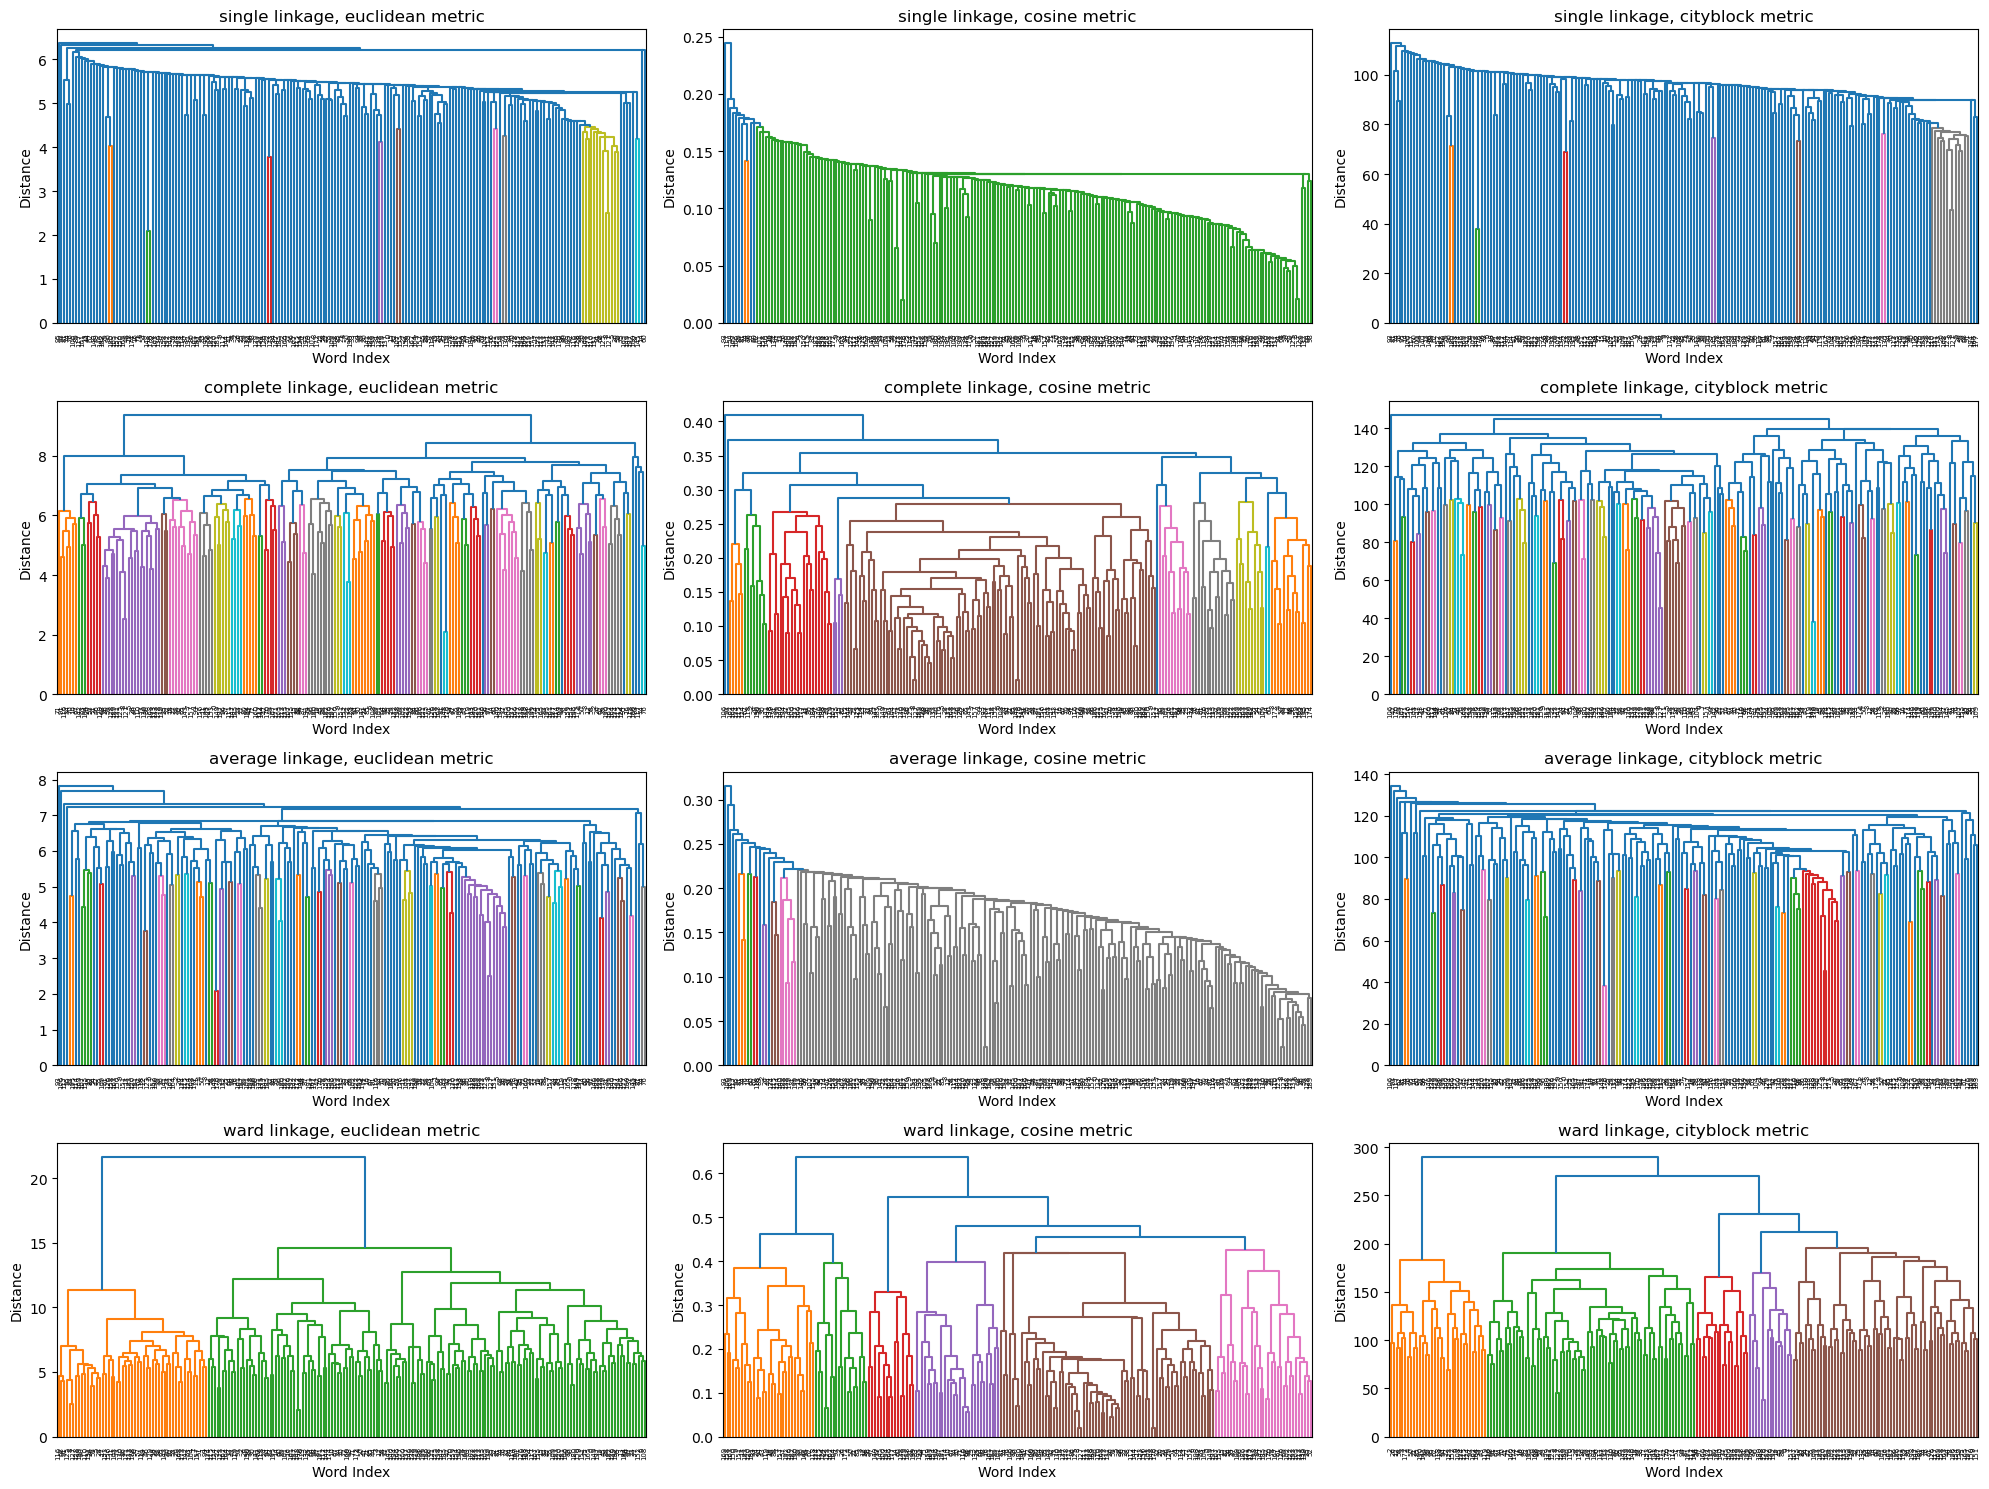

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import numpy as np

linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'cityblock'] 
X = string_array  # Your data

plt.figure(figsize=(20, 15))

plot_num = 1

for method in linkage_methods:
    for metric in distance_metrics:

        dist_matrix = pdist(X, metric=metric)
        linkage_matrix = linkage(dist_matrix, method=method)

        plt.subplot(len(linkage_methods), len(distance_metrics), plot_num)
        dendrogram(linkage_matrix)
        plt.title(f'{method} linkage, {metric} metric')
        plt.xlabel('Word Index')
        plt.ylabel('Distance')
        
        plot_num += 1

plt.tight_layout()
plt.savefig('plots/8_dendrogram_combinations.png')
plt.show()


In [33]:
from scipy.cluster.hierarchy import fcluster

kbest1 = 6  
kbest2 = 3 

Z_best = linkage(X, method='ward', metric='euclidean')

clusters_kbest1 = fcluster(Z_best, t=kbest1, criterion='maxclust')

clusters_kbest2 = fcluster(Z_best, t=kbest2, criterion='maxclust')

print(clusters_kbest1)

[6 1 2 3 3 1 6 1 1 6 3 1 3 6 3 6 3 1 1 6 1 3 2 6 2 3 2 1 1 3 2 4 6 2 3 5 1
 4 1 2 1 3 5 2 3 6 1 6 3 1 3 1 5 1 6 6 6 1 3 1 3 6 2 1 3 1 5 3 1 5 3 3 3 1
 6 6 6 6 5 6 1 6 6 3 6 3 1 3 6 3 6 1 1 2 2 6 1 6 3 1 4 3 5 1 1 5 6 6 6 6 1
 1 3 5 6 2 1 6 2 2 6 5 5 2 2 1 6 1 1 1 1 1 3 1 2 5 6 4 4 5 4 2 1 1 3 4 4 5
 3 6 6 6 6 1 5 6 1 1 6 5 3 3 2 6 2 6 4 5 1 6 5 1 3 1 3 5 3 4 1 4 6 6 6 6 6
 5 5 3 4 1 2 3 6 5 4 3 5 6 5 4]


In [34]:
clustered_words = {i: [] for i in range(1, kbest1 + 1)}  # Labels start from 1, so range should go from 1 to kbest1

# Assign words to corresponding clusters
for word, label in zip(words, clusters_kbest1):
    clustered_words[label].append(word)

# Print results
for cluster, words_in_cluster in clustered_words.items():
    print(f"Cluster {cluster}:")
    print(", ".join(words_in_cluster))

Cluster 1:
sing, listen, dive, flame, knock, exit, brick, smile, bury, download, hard, bend, fight, face, scream, kiss, selfie, catch, hit, paint, far, cry, sleep, hollow, clean, sad, empty, slide, drink, door, draw, pray, arrest, buy, burn, fire, close, angry, lazy, scary, hang, tattoo, earth, enter, key, swim, happy, loud, love, cook, cut
Cluster 2:
deer, spider, shark, giraffe, lizard, feather, frog, fly, starfish, peacock, fish, ant, goldfish, bird, spiderman, bee, beetle, snake, dragonfly, butterfly, crocodile
Cluster 3:
panda, ape, sit, cat, eraser, carrot, bear, grass, forest, eat, puppet, gym, kneel, monkey, cow, pencil, plant, dig, run, clap, pull, sun, puppy, feet, pear, fruit, grape, finger, tree, fingerprints, rain, zip, tomato, elephant, pant, rainy, potato, shoe, sunny
Cluster 4:
brush, spoon, scissor, hammer, toothbrush, screwdriver, teaspoon, length, sword, knife, toothpaste, comb, fork, paintbrush
Cluster 5:
postcard, call, passport, microwave, notebook, microphone, la

In [37]:
clustered_words = {i: [] for i in range(1, kbest2 + 1)}  

for word, label in zip(words, clusters_kbest2):
    clustered_words[label].append(word)

for cluster, words_in_cluster in clustered_words.items():
    print(f"Cluster {cluster}:")
    print(", ".join(words_in_cluster))

Cluster 1:
sing, listen, dive, flame, knock, exit, brick, smile, bury, download, hard, bend, fight, face, scream, kiss, selfie, catch, hit, paint, far, cry, sleep, hollow, clean, sad, empty, slide, drink, door, draw, pray, arrest, buy, burn, fire, close, angry, lazy, scary, hang, tattoo, earth, enter, key, swim, happy, loud, love, cook, cut
Cluster 2:
deer, panda, ape, sit, cat, eraser, carrot, bear, spider, shark, grass, giraffe, forest, lizard, feather, eat, frog, puppet, fly, gym, kneel, monkey, cow, pencil, starfish, plant, dig, run, clap, pull, sun, puppy, feet, pear, peacock, fish, fruit, grape, finger, ant, goldfish, bird, spiderman, bee, tree, beetle, snake, fingerprints, rain, zip, tomato, dragonfly, butterfly, elephant, pant, rainy, potato, crocodile, shoe, sunny
Cluster 3:
drive, rose, helicopter, needle, table, fishing, bullet, brush, mug, postcard, spoon, call, lake, climb, passport, roof, stairs, rifle, bed, microwave, notebook, knit, van, sweater, cigarette, microphone, 

#### Hierarchial is better than gmm as it is grouping slightly better than gmm in terms of meaning of words in a cluster
example cluster 1 has verbs and emotions while in the gmm classification it has broader range of words with emotions nouns verbs, some animals, vehicles etc